In [1]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune
import jax.numpy as jnp

summer_fits = Polyfit('summer_data/fits.npz', input_h5='summer_data/inputdata.h5',
 order=3, covariance = True, fit_obs = list(range(1,16)), cpu = True, pdf_uncertainty = True)
#take first two bins of first 15 observables (which have 8 bins each)
target_bins = [i for i in range(8*15) if i%8 == 0 or i%8 == 1]
summer_tune_no_err = Paramtune('summer_data/fits.npz', 'summer_data/HEPData-ins1736531-v1-csv.h5',
 covariance = False, target_bins = target_bins)
summer_tune_cov = Paramtune('summer_data/fits.npz', 'summer_data/HEPData-ins1736531-v1-csv.h5',
 covariance = True, target_bins = target_bins)


Filtered 102833 of 134343 total bins for invalid input
Choosing to fit observables with ['d01-', 'd02-', 'd03-', 'd04-', 'd05-', 'd06-', 'd07-', 'd08-', 'd09-', 'd10-', 'd11-', 'd12-', 'd13-', 'd14-', 'd15-']
Fitting 945 of 945: /ATLAS_2019_I1736531/d15-x01-y01[AUX_pdfup]#6               
Fits written to summer_data/fits.npz
loading  summer_data/fits.npz
(30,) (30,)
Calculated inital guess:  [0.12935856]
Tuned Parameters:  [0.1294486] , Objective =  2889.0409739354295 , chi2/ndf =  99.62210254949757
Covariance of Tuned Parameters:  [[9.22864757e-07]]
loading  summer_data/fits.npz
(30,) (30,)
Calculated inital guess:  [0.12618639]
Tuned Parameters:  [0.12629575] , Objective =  283.98614647713606 , chi2/ndf =  9.792625740590898
Covariance of Tuned Parameters:  [[2.35162729e-06]]


target deviation 32.0585, with confidence level 0.6827, edof 29.0000
target deviation 32.0585, with confidence level 0.6827, edof 29.0000


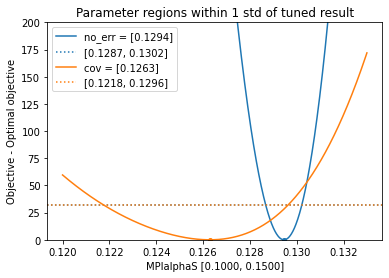

In [2]:
graph_range = [0.12, 0.133]
summer_tune_no_err.graph_objective(graph_range = graph_range, log_scale = False)
summer_tune_cov.graph_objective(new_figure = False, graph_range = graph_range, log_scale = False)

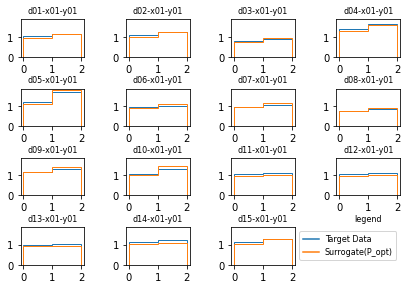

In [3]:
summer_tune_cov.graph_tune_all()

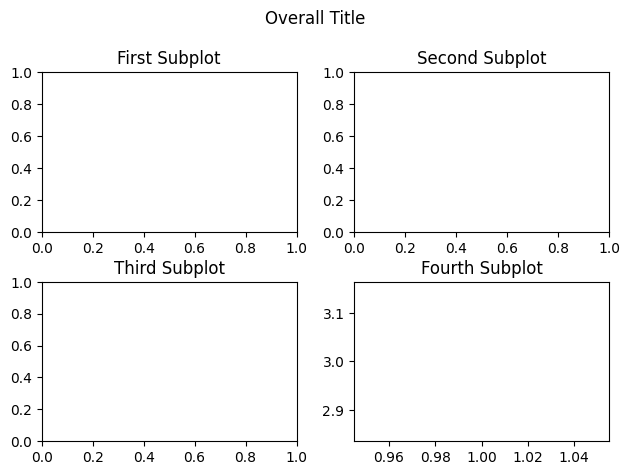

In [4]:
import matplotlib.pyplot as plt
#define subplots
fig, ax = plt.subplots(2, 2)
fig.tight_layout(h_pad=2)

#define subplot titles
ax[0, 0].set_title('First Subplot')
ax[0, 1].set_title('Second Subplot')
ax[1, 0].set_title('Third Subplot')
ax[1, 1].set_title('Fourth Subplot')
plt.subplot(2,2,4)
plt.plot(1,3)

#add overall title and adjust it so that it doesn't overlap with subplot titles
fig.suptitle('Overall Title')
plt.subplots_adjust(top=0.85)

#display subplots 
plt.show()

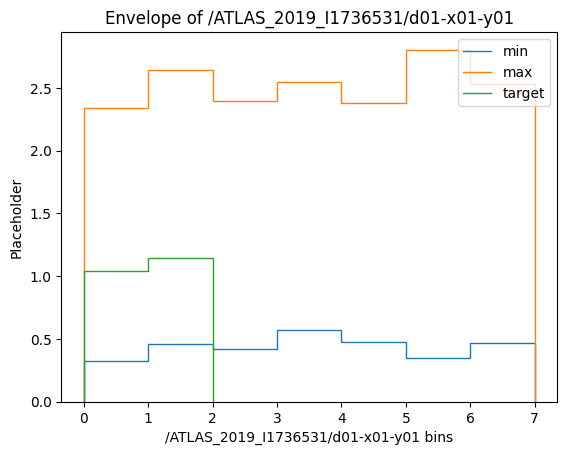

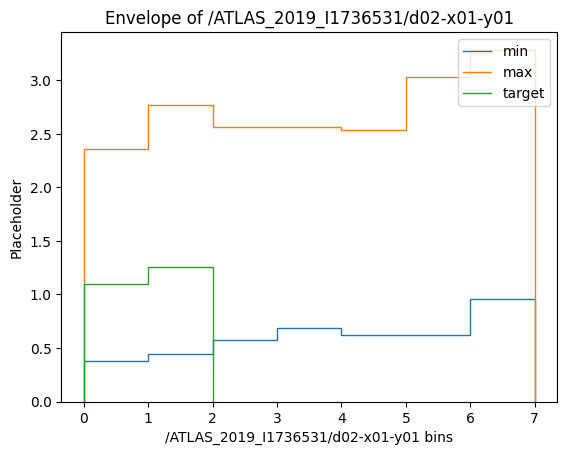

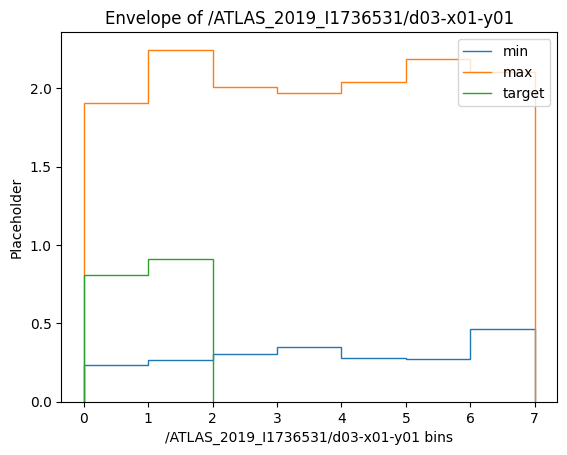

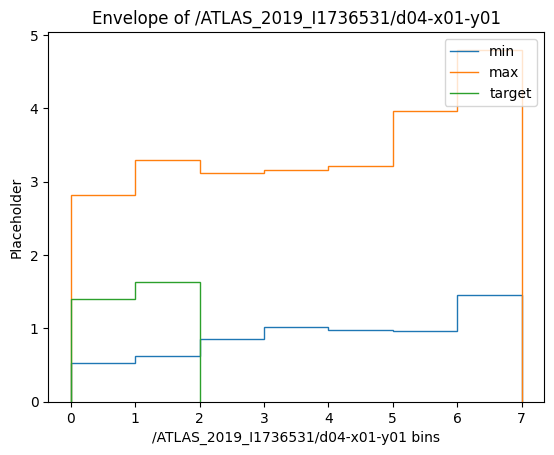

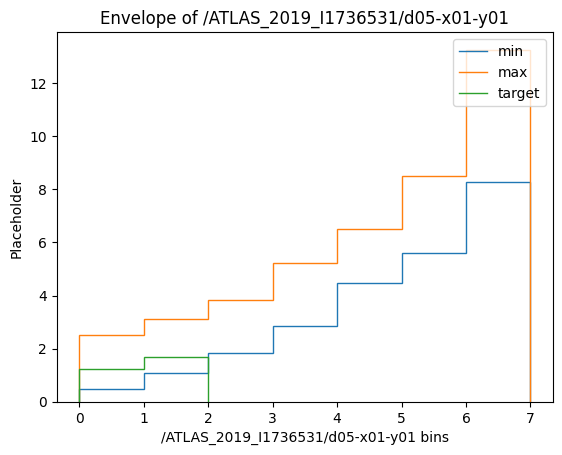

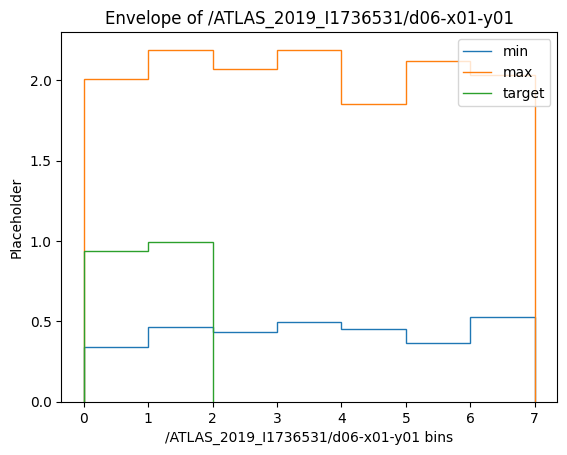

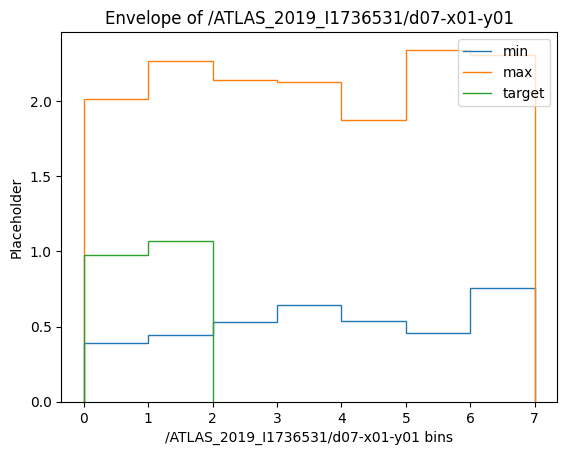

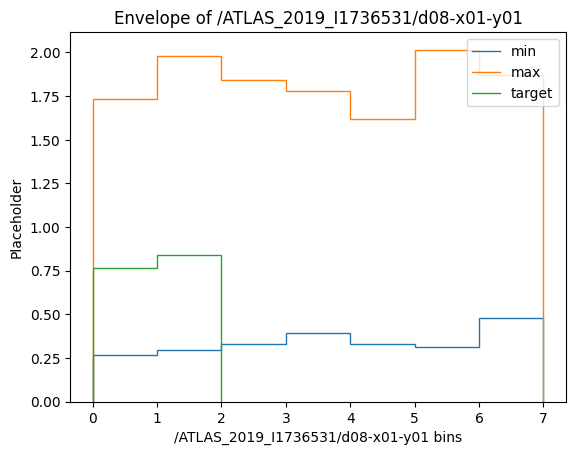

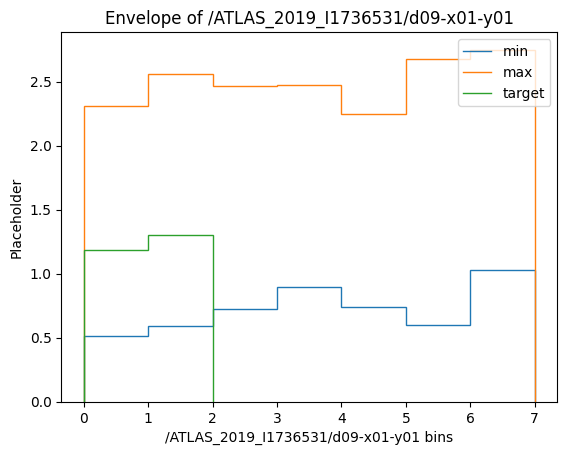

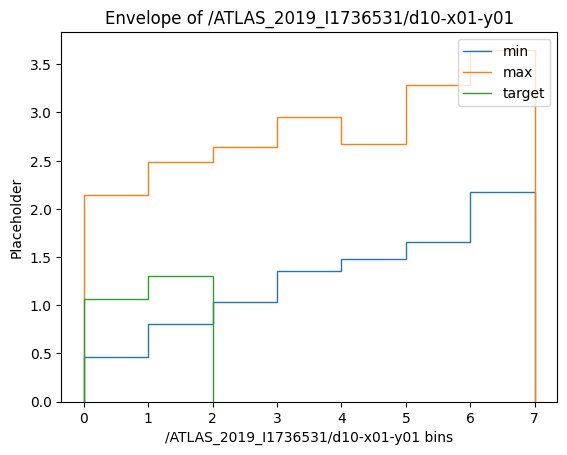

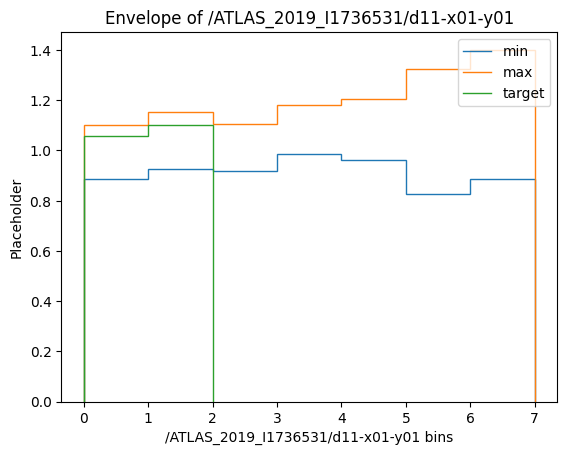

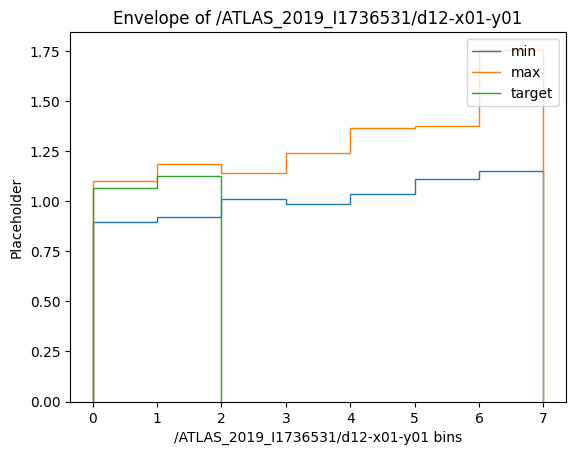

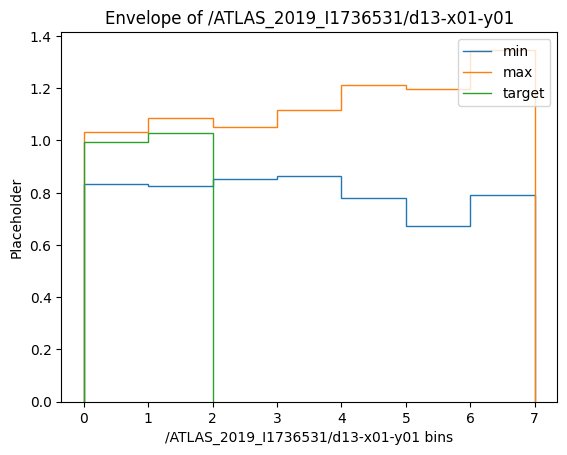

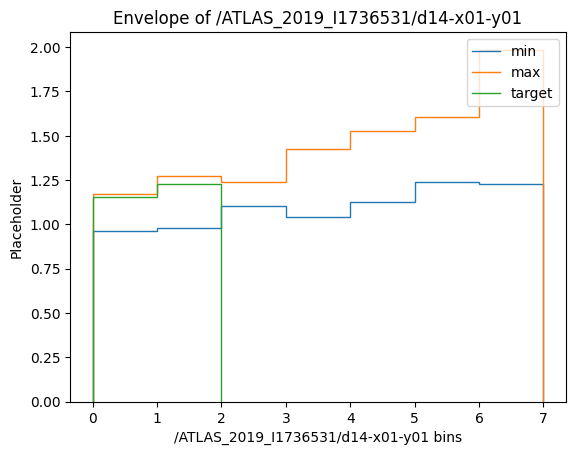

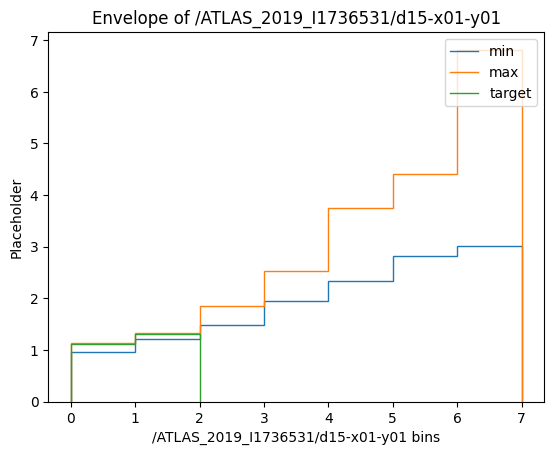

In [5]:
summer_tune_no_err.graph_envelope_target()